### Setup Environment:

In [1]:
# Path to main dir eq: %cd ..
%cd /home/datascience/DF-DM/

/home/datascience/DF-DM


In [2]:
from src.embeddings import load_data, split_dataset, train_and_evaluate_model

# Class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Models
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Support vector machine
from sklearn.svm import SVC
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

/home/datascience/conda/data_fusion_v0_0_1/lib/python3.8/site-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
2024-03-05 00:20:28.337942: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 00:20:28.378341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 00:20:29.214985: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Evaluate the Embeddings

In [3]:
def run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, NORMAL=False, DR_ICDR_3=False):
    
    # Get the dataset
    X, y = load_data(labels_path=LABELS_PATH, backbone=EMBEDDINGS_BACKBONE, label=LABEL, directory=EMBEDDINGS_DIR, normal=NORMAL, DR_ICDR_3=DR_ICDR_3)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=TEST_SIZE)

    # Define a list of models to test
    if CLASS_WEIGTHS:
        class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
        # Create a dictionary from class labels and weights
        class_weights = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}
        print(f'Setting class weigths to: {class_weights}')

        models = [
            #("SVM", SVC(class_weight=class_weights, probability=True)),
            ("Logistic Regression", LogisticRegression(class_weight=class_weights)),
            #('Decision Tree', DecisionTreeClassifier(class_weight=class_weights)),
            ("Neural Network", MLPClassifier())
        ]
    else:
        models = [
            #("SVM", SVC(probability=True)),
            ("Logistic Regression", LogisticRegression()),
            #('Decision Tree', DecisionTreeClassifier()),
            ("Neural Network", MLPClassifier())
        ]

    # Run the experiments
    train_and_evaluate_model(X_train, X_test, y_train, y_test, models=models)

#### Constants

In [4]:
# Constants:
LABELS_PATH = '/home/datascience/DF-DM/datasets/BRSET/labels.csv'
EMBEDDINGS_BACKBONE = 'dinov2_giant'
EMBEDDINGS_DIR = 'Embeddings_c/brset/'
TEST_SIZE = 0.3
CLASS_WEIGTHS = True

## Diabetic Retinopathy

### 5 Class

Training set size is: 11386 rows and 1536 columns
Test set size is: 4880 rows and 1536 columns


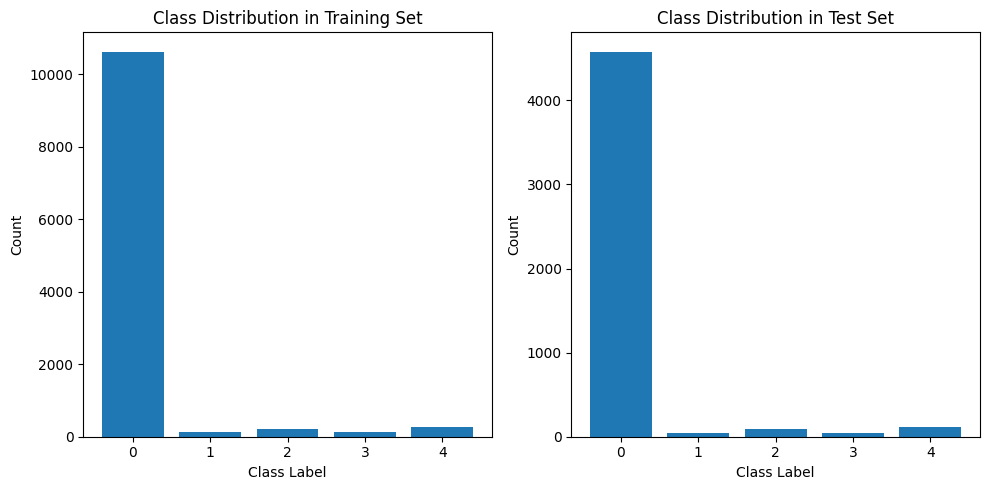

Setting class weigths to: {0: 0.214203743768225, 1: 19.136134453781512, 2: 10.398173515981735, 3: 16.265714285714285, 4: 8.220938628158844}


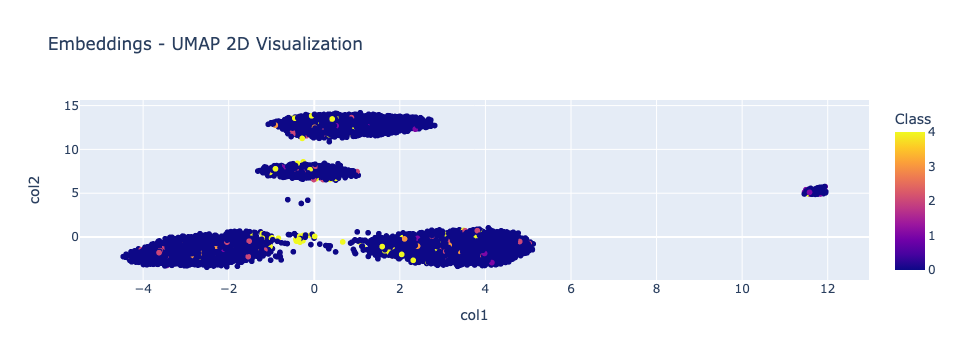

####################  Logistic Regression  ####################


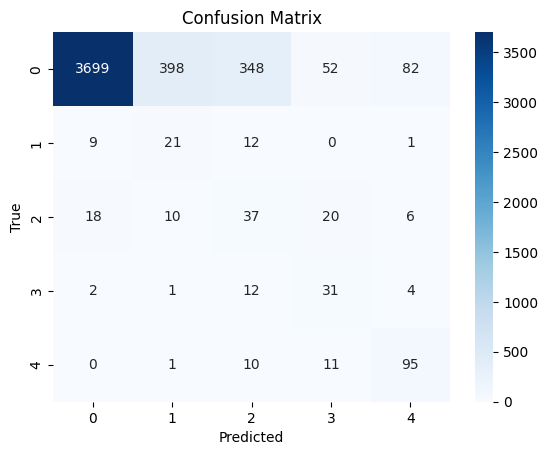

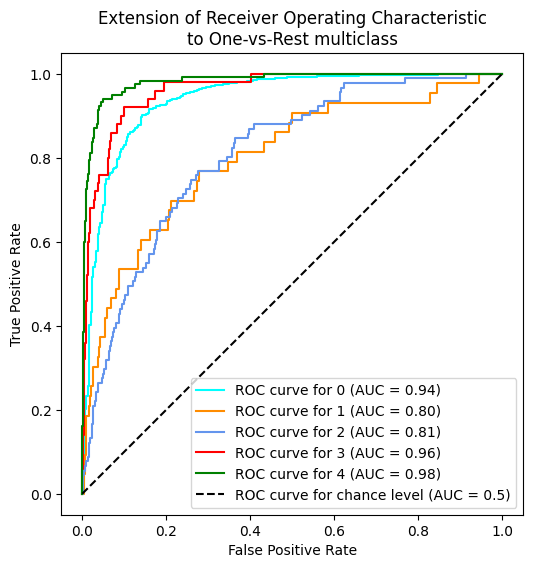

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      4579
           1       0.05      0.49      0.09        43
           2       0.09      0.41      0.15        91
           3       0.27      0.62      0.38        50
           4       0.51      0.81      0.62       117

    accuracy                           0.80      4880
   macro avg       0.38      0.63      0.43      4880
weighted avg       0.95      0.80      0.86      4880

####################  Neural Network  ####################


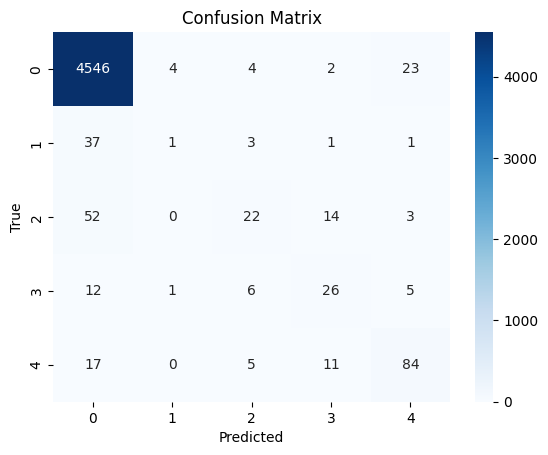

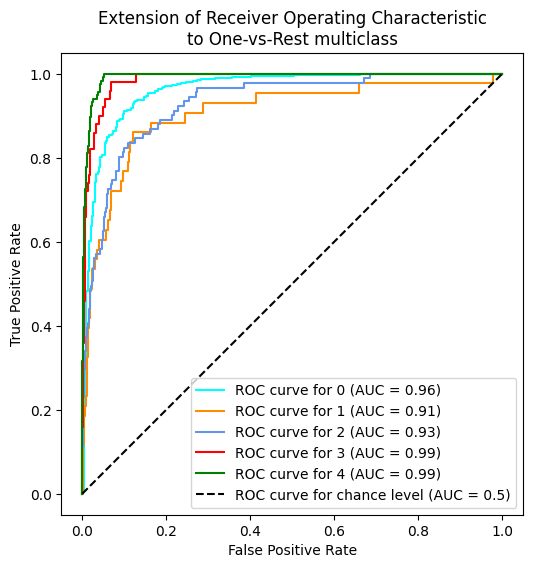

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4579
           1       0.17      0.02      0.04        43
           2       0.55      0.24      0.34        91
           3       0.48      0.52      0.50        50
           4       0.72      0.72      0.72       117

    accuracy                           0.96      4880
   macro avg       0.58      0.50      0.52      4880
weighted avg       0.95      0.96      0.95      4880



In [5]:
LABEL = 'DR_ICDR'
DR_ICDR_3 = False

run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3)

### 3 Class

Training set size is: 11386 rows and 1536 columns
Test set size is: 4880 rows and 1536 columns


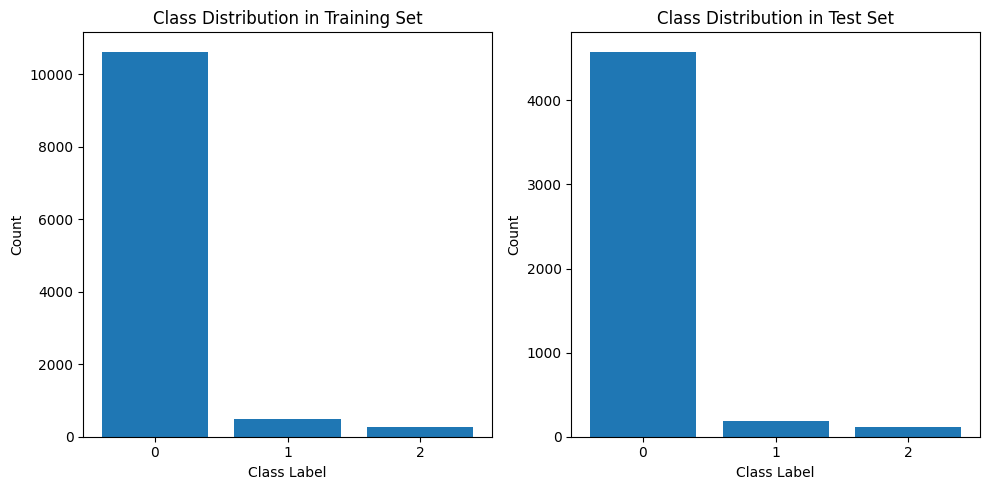

Setting class weigths to: {0: 0.35700623961370836, 1: 7.94002789400279, 2: 13.701564380264742}


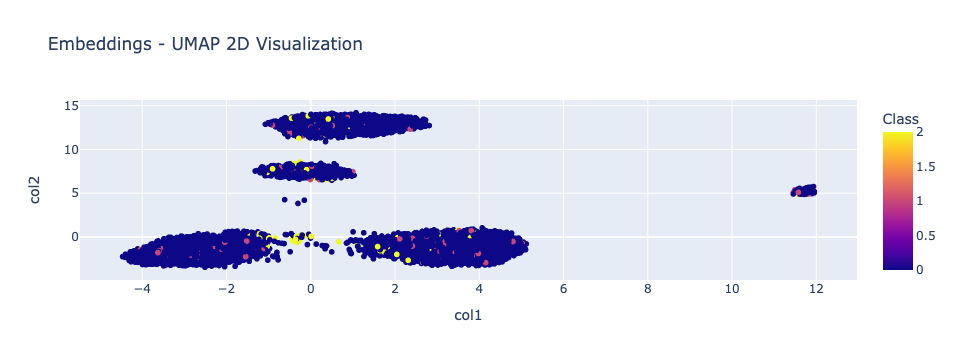

####################  Logistic Regression  ####################


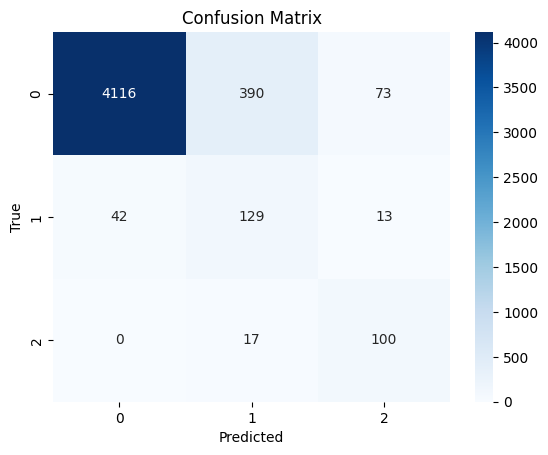

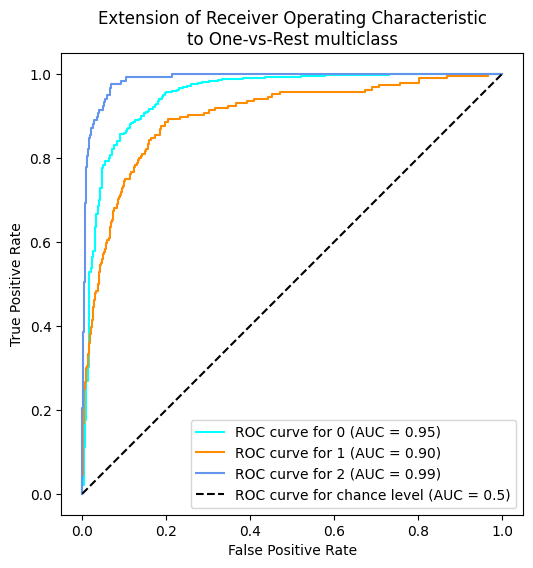

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4579
           1       0.24      0.70      0.36       184
           2       0.54      0.85      0.66       117

    accuracy                           0.89      4880
   macro avg       0.59      0.82      0.65      4880
weighted avg       0.95      0.89      0.91      4880

####################  Neural Network  ####################


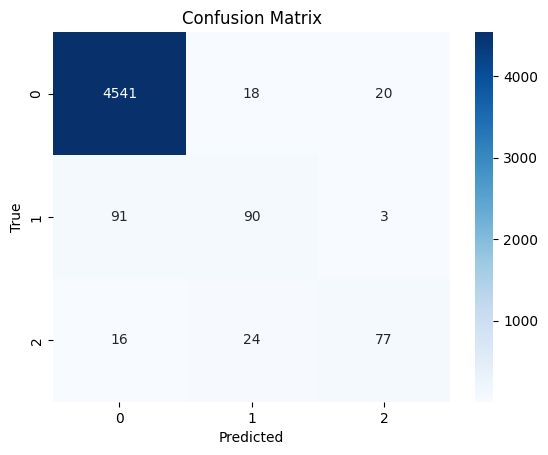

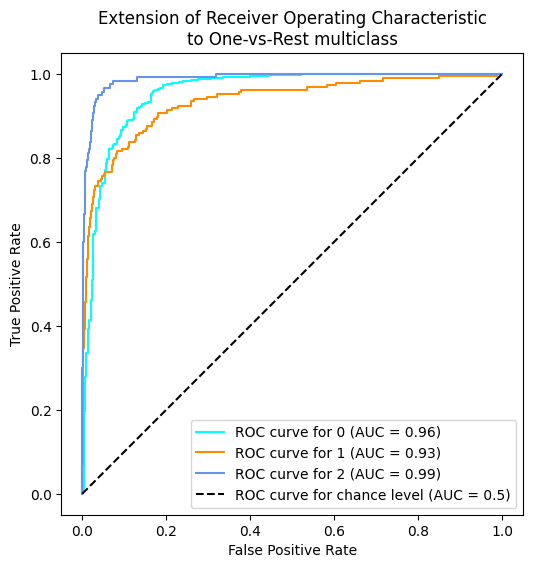

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4579
           1       0.68      0.49      0.57       184
           2       0.77      0.66      0.71       117

    accuracy                           0.96      4880
   macro avg       0.81      0.71      0.75      4880
weighted avg       0.96      0.96      0.96      4880



In [6]:
LABEL = 'DR_ICDR'
DR_ICDR_3= True

run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3)

### 2 Class

Training set size is: 11386 rows and 1536 columns
Test set size is: 4880 rows and 1536 columns


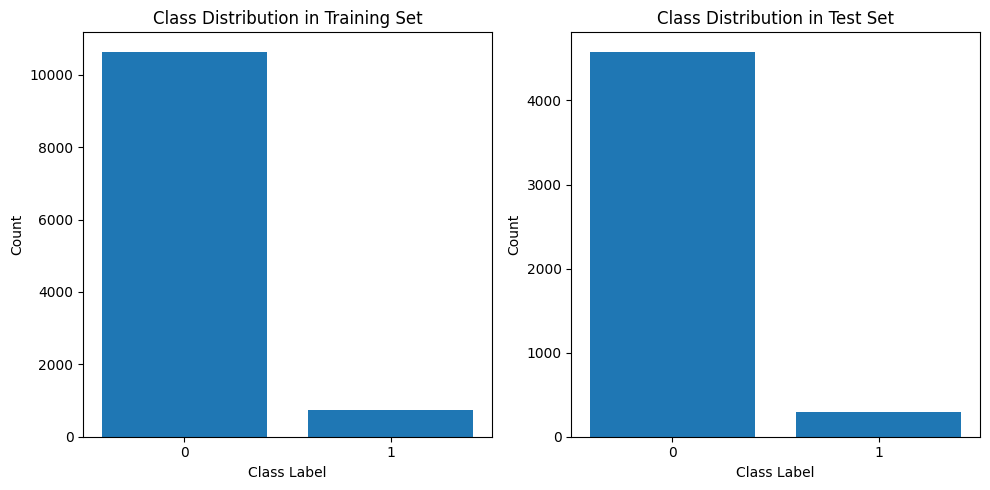

Setting class weigths to: {0: 0.5351066829589247, 1: 7.621151271753681}


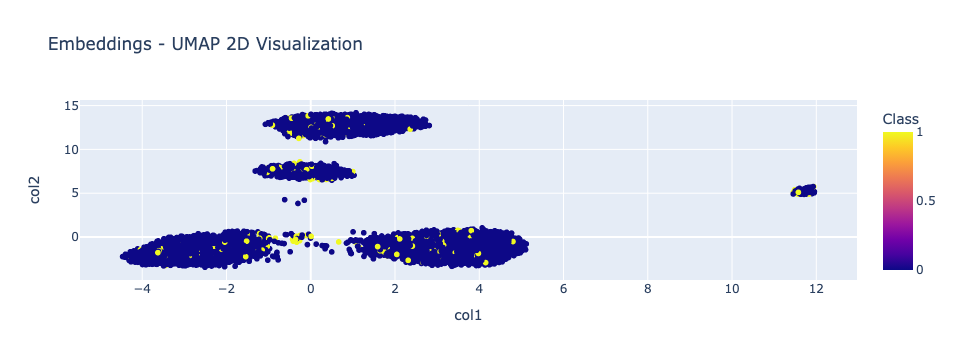

####################  Logistic Regression  ####################


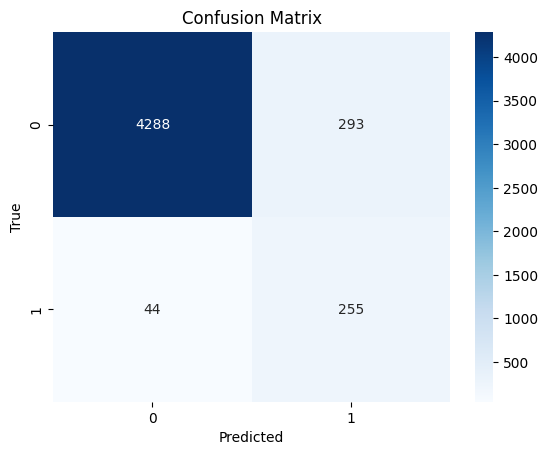

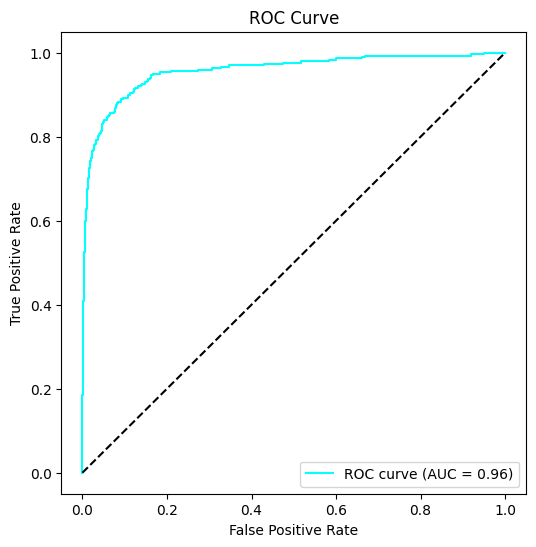

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4581
           1       0.47      0.85      0.60       299

    accuracy                           0.93      4880
   macro avg       0.73      0.89      0.78      4880
weighted avg       0.96      0.93      0.94      4880

####################  Neural Network  ####################


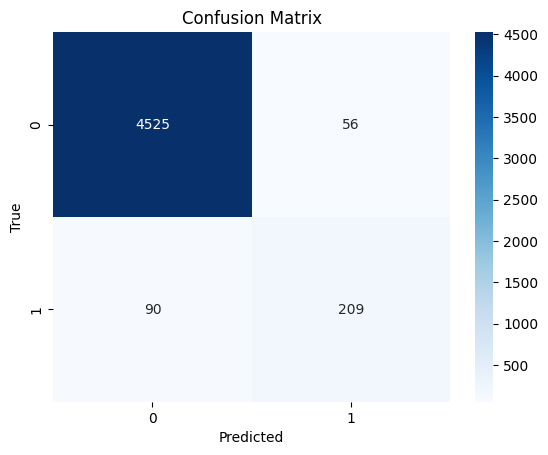

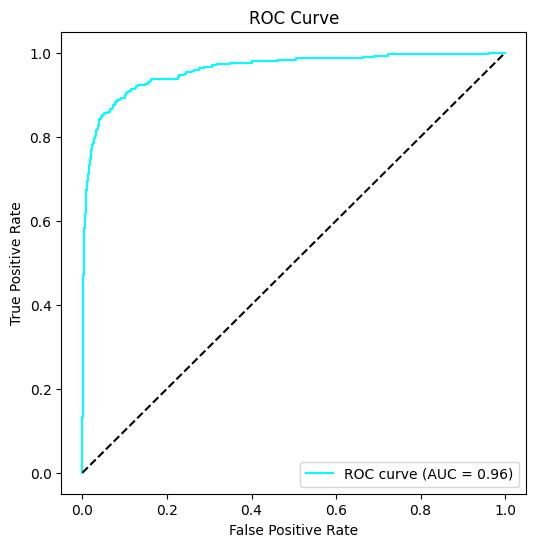

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4581
           1       0.79      0.70      0.74       299

    accuracy                           0.97      4880
   macro avg       0.88      0.84      0.86      4880
weighted avg       0.97      0.97      0.97      4880



In [7]:
LABEL = 'diabetic_retinopathy'
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS)